In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [4]:
seed =10
N = 5000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
t = np.arange(0,5000,0.1)
K = 4.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

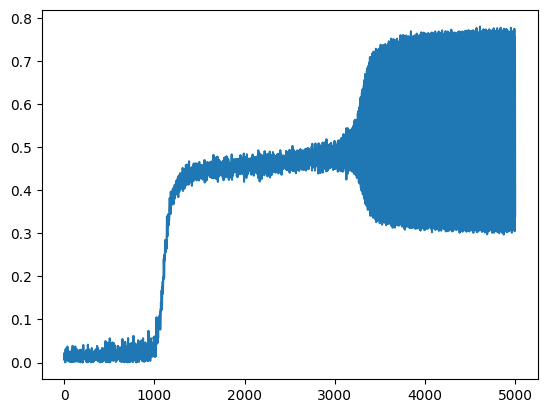

In [5]:
plt.plot(t,rs)

In [217]:
arg = np.argsort(avg_dtheta[-1])

In [218]:
def get_group_index(data_):
    diff_dtheta = np.diff(data_)
    peaks, _ = find_peaks(diff_dtheta, height=0.05)
    diff_peaks = np.diff(peaks)
    temp = np.array([False, *np.where(diff_peaks>5,True,False)])
    New_peaks = peaks[temp]
    New_diff_peaks = [0,*np.diff(New_peaks)]
    idx_max = np.argmax(New_diff_peaks)
    if idx_max == len(New_diff_peaks)-1:
        return np.array([N//2,N//2,N//2,N//2])
    elif len(New_peaks)>4:
        Groups = idx_max + np.array([-2,-1,0,1])
        temp_G = New_peaks[Groups]
        if np.argmax(np.diff(temp_G))!=1:
            Groups = idx_max + np.array([-1,0,1,2])
            temp_G = New_peaks[Groups]
        group_index = temp_G
    elif len(New_peaks)==4:
        group_index = New_peaks
    elif len(New_peaks)>2:
        Groups = idx_max + np.array([-1,0,1])
        temp_G = New_peaks[Groups]
        temp = np.argmax([0,*np.diff(temp_G)])
        A_,B_ = temp_G[temp-1],temp_G[temp]
        group_index = np.array([A_,A_,B_,B_])
    else: 
        group_index = np.array([N//2,N//2,N//2,N//2])
    return group_index

In [6]:
def get_groups(dtheta,sum_time=500):
    dtheta_c = np.cumsum(dtheta,axis=0)
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
    num_data = []
    omega_data = []
    for data in avg_dtheta[-500:]:
        diff_dtheta = np.diff(np.sort(data))
        peaks, _ = find_peaks(diff_dtheta, height=0.01)
        num_data.append(np.diff(peaks))
    groups = []
    N = len(dtheta[-1])
    for diff in num_data:
        sort_re = np.sort(diff)[::-1]
        temp = []
        for i in sort_re[:5]:
            temp.append(i)
        if len(sort_re) == 0:
            temp = [N,0,0,0,0]
        else:
            for i in range(5- len(sort_re)):
                temp.append(0)
        groups.append(temp)
    return groups

In [7]:
get_groups(dtheta)

[[2814, 689, 648, 142, 47],
 [2814, 689, 648, 142, 47],
 [2814, 689, 648, 142, 50],
 [2814, 689, 648, 85, 57],
 [2814, 689, 648, 85, 57],
 [2814, 689, 648, 57, 50],
 [2814, 689, 648, 57, 50],
 [2814, 689, 648, 57, 50],
 [2814, 689, 648, 57, 50],
 [2814, 689, 648, 57, 50],
 [2814, 689, 648, 57, 50],
 [2814, 689, 648, 50, 50],
 [2814, 689, 648, 50, 50],
 [2814, 689, 648, 50, 50],
 [2814, 689, 648, 50, 50],
 [2814, 689, 648, 50, 47],
 [2814, 689, 648, 77, 47],
 [2814, 689, 648, 77, 49],
 [2814, 689, 648, 77, 49],
 [2814, 689, 648, 77, 49],
 [2814, 689, 648, 79, 47],
 [2814, 689, 648, 79, 47],
 [2814, 689, 648, 87, 56],
 [2814, 689, 648, 87, 64],
 [2814, 689, 648, 87, 64],
 [2814, 689, 648, 64, 56],
 [2814, 689, 648, 64, 56],
 [2814, 689, 648, 64, 56],
 [2814, 689, 648, 64, 43],
 [2814, 689, 648, 94, 81],
 [2814, 689, 648, 94, 62],
 [2814, 689, 648, 94, 62],
 [2814, 689, 648, 94, 62],
 [2814, 689, 648, 112, 62],
 [2814, 689, 648, 135, 47],
 [2814, 689, 648, 70, 65],
 [2814, 689, 648, 70, 6

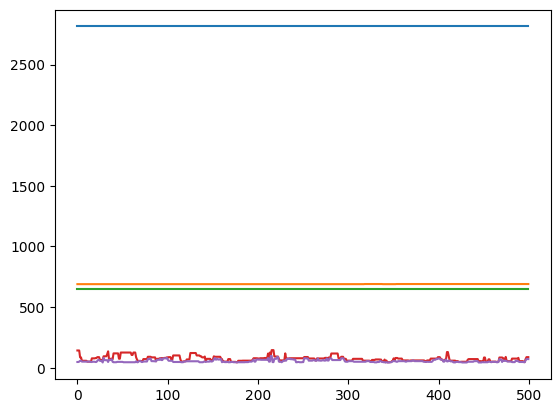

In [8]:
plt.plot(get_groups(dtheta))

In [222]:
groups = []

for i,D in enumerate(avg_dtheta):
    temp = get_group_index(np.sort(D))
    groups.append(temp)

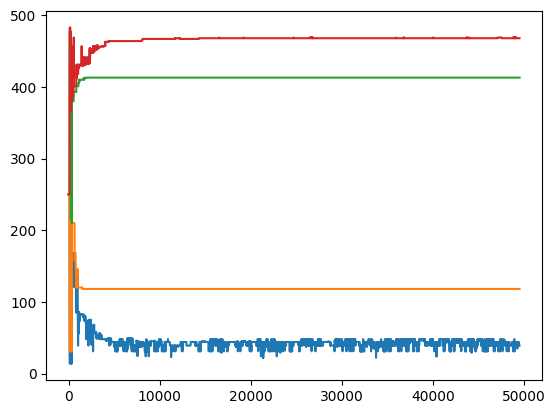

In [223]:
plt.plot(groups)

In [224]:
### 교통 데이터 , pocker plank equation 읽어보기

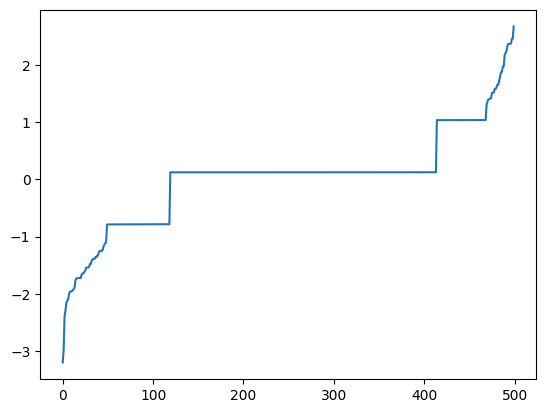

In [225]:
plt.plot(np.sort(avg_dtheta[-1]))

In [14]:
def get_cluster(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    c_l,c_r = arg_psize[num],arg_psize[num]+1
    cluster = np.array([peaks_new[c_l],peaks_new[c_r]-1])
    size = np.diff(np.array([peaks_new[c_l],peaks_new[c_r]-1]))
    return cluster,size


def near_main(peaks):
    num = 0
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    left_l,left_r = arg_psize[num]-1,arg_psize[num]
    l_cluster = np.array([peaks_new[left_l],peaks_new[left_r]-1])
    
    right_l,right_r = arg_psize[num]+1,arg_psize[num]+2
    r_cluster = np.array([peaks_new[right_l],peaks_new[right_r]-1])
    return l_cluster,r_cluster

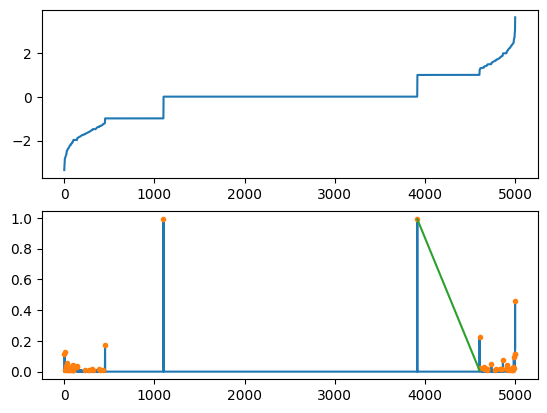

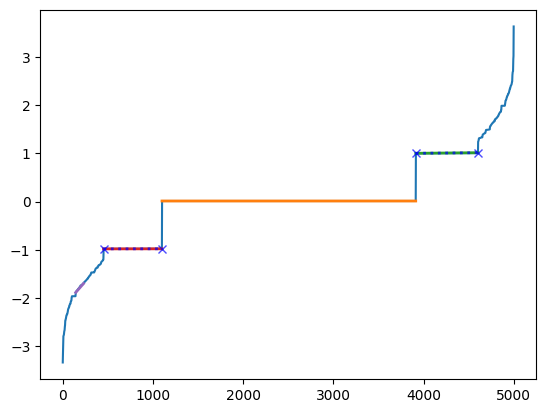

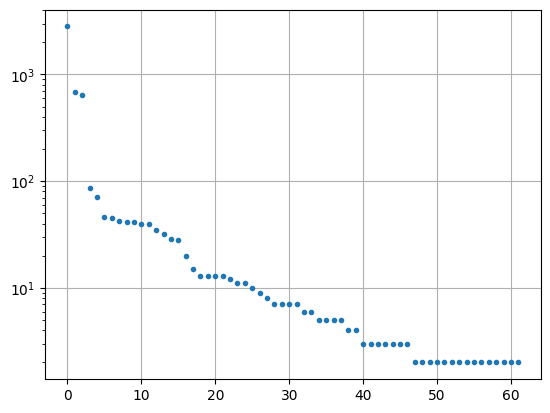

In [15]:
plt.subplot(211)
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
plt.plot(SD)
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff([SD[0],*SD])

plt.plot(diff_dtheta)
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
# peaks = peaks[p_arg]
# peaks = peaks[np.where((peaks<N)&(peaks>1))]

# peaks_new = [peaks[0],*peaks]
# psize = np.diff(peaks_new)
# arg_psize = np.argsort(psize)[::-1] 
C_0,S_0 = get_cluster(peaks,0)
C_1,S_1 = get_cluster(peaks,1)
C_2,S_2 = get_cluster(peaks,2)
C_3,S_3 = get_cluster(peaks,3)
l_c,r_c = near_main(peaks)
max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(C_1,diff_dtheta[np.array(C_1)])
# plt.yscale('log')

# plt.ylim(0,10)
plt.figure()

SD = avg_dtheta[index][arg]
plt.plot(SD)
plt.plot(np.arange(N)[np.array(C_0)],SD[np.array(C_0)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_1)],SD[np.array(C_1)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_2)],SD[np.array(C_2)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_3)],SD[np.array(C_3)],lw=2,ls='-')
plt.plot(np.arange(N)[l_c],SD[l_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.plot(np.arange(N)[r_c],SD[r_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
plt.yscale('log')

plt.grid()

In [228]:
print(S_1,S_2,S_3)

[69] [54] [6]


In [288]:
cluster_0 = arg[C_0[0]:C_0[1]]
cluster_1 = arg[C_1[0]:C_1[1]]
cluster_2 = arg[C_2[0]:C_2[1]]
cluster_l = arg[l_c[0]:l_c[1]]
cluster_r = arg[r_c[0]:r_c[1]]

In [289]:
rpsi = 1/N*np.sum(np.exp(1j*theta),axis=1)
r = np.abs(rpsi)
psi = np.angle(rpsi)

In [231]:
import seaborn as sns

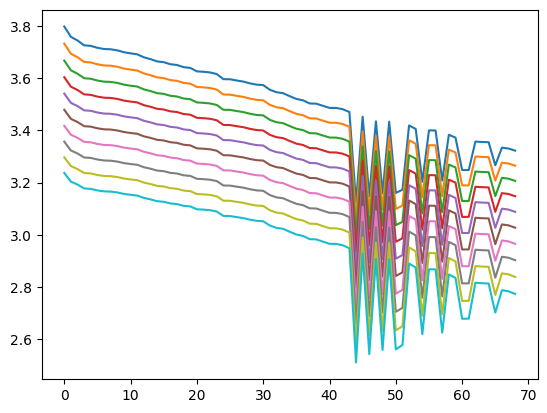

In [232]:
plt.plot((theta[-10:,cluster_1].T-psi[-10:])%(2*np.pi))

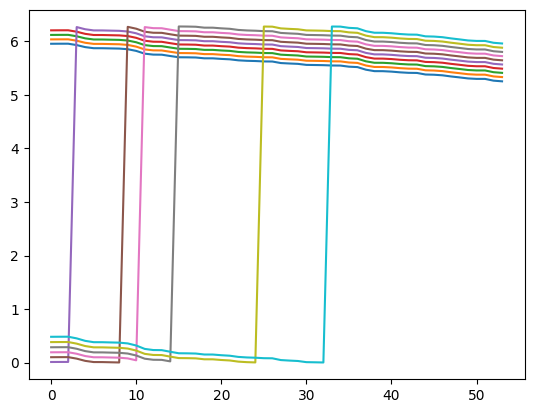

In [233]:
plt.plot(theta[-10:,cluster_2].T%(2*np.pi))

In [290]:
rpsi = 1/N*np.sum(np.exp(1j*theta),axis=1)
r = np.abs(rpsi)
psi = np.angle(rpsi)



<AxesSubplot: ylabel='Density'>

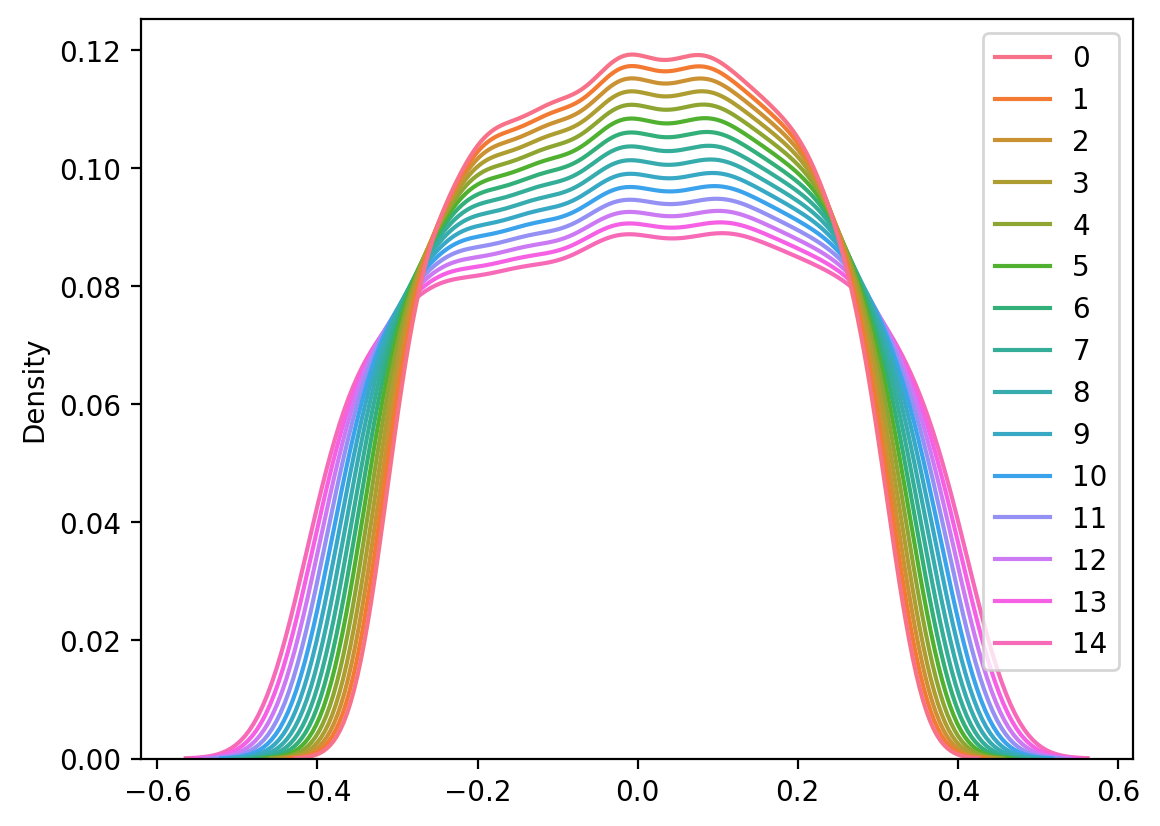

In [291]:
sns.kdeplot((theta[-15::1,cluster_0].T-psi_c0[-15::1]+np.pi)%(2*np.pi)-np.pi)


In [292]:
rpsi_c1 = 1/N*np.sum(np.exp(1j*theta[:,cluster_1]),axis=1)
r_c1 = np.abs(rpsi_c1)
psi_c1 = np.angle(rpsi_c1)

In [293]:
rpsi_c2 = 1/N*np.sum(np.exp(1j*theta[:,cluster_2]),axis=1)
r_c2 = np.abs(rpsi_c2)
psi_c2 = np.angle(rpsi_c2)

In [301]:
rpsi_c0 = 1/N*np.sum(np.exp(1j*theta[:,cluster_0]),axis=1)
r_c0 = np.abs(rpsi_c0)
psi_c0 = np.angle(rpsi_c0)

rpsi_cl = 1/N*np.sum(np.exp(1j*theta[:,cluster_l]),axis=1)
r_cl = np.abs(rpsi_cl)
psi_cl = np.angle(rpsi_cl)

rpsi_cr = 1/N*np.sum(np.exp(1j*theta[:,cluster_r]),axis=1)
r_cr = np.abs(rpsi_cr)
psi_cr = np.angle(rpsi_cr)

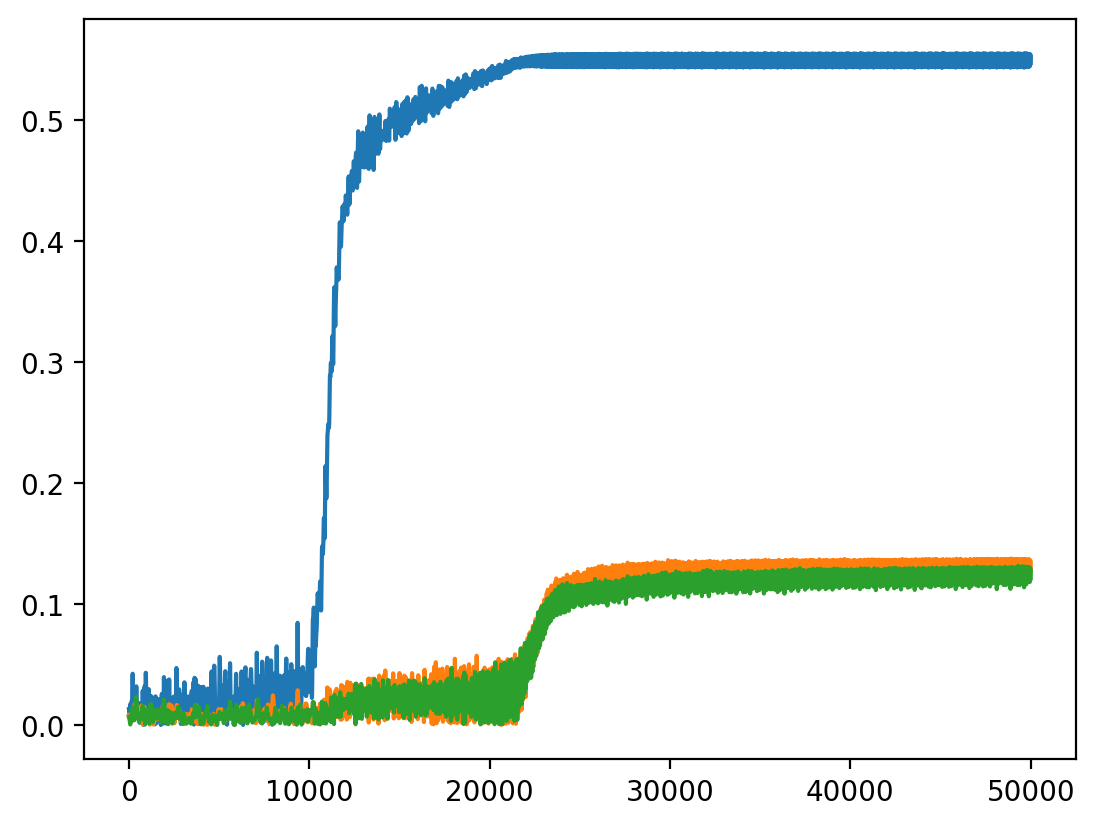

In [302]:
plt.plot(r_c0)
plt.plot(r_c1)
plt.plot(r_c2)

# plt.plot(r_c0 - r_c1 - r_c2)
# plt.plot(avg_rs)
# plt.plot(r)

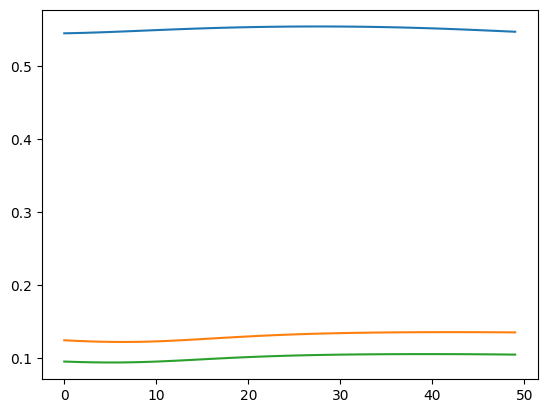

In [239]:
plt.plot(r_c0[-50::1])
plt.plot(r_c1[-50::1])
plt.plot(r_c2[-50::1])

<AxesSubplot: ylabel='Density'>

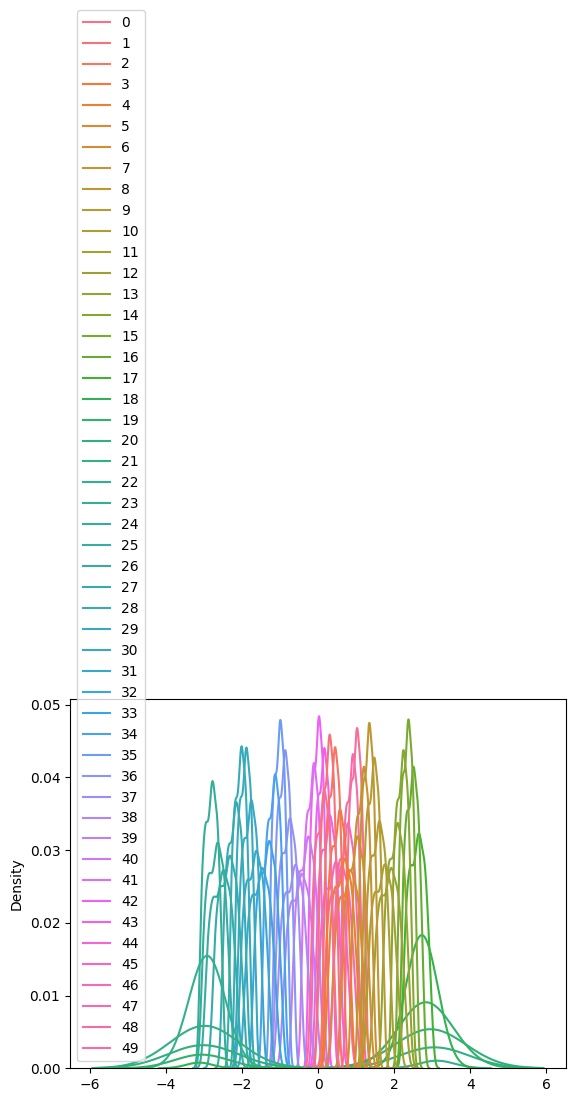

In [240]:
sns.kdeplot((theta[-500::10,cluster_0].T-psi_c0[-500::10]+np.pi)%(2*np.pi)-np.pi)


<AxesSubplot: ylabel='Density'>

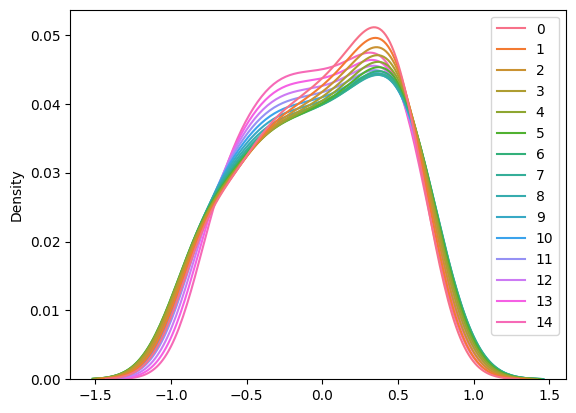

In [241]:
sns.kdeplot((theta[-50:-35:1,cluster_1].T-psi_c1[-50:-35:1]+np.pi)%(2*np.pi)-np.pi)

<AxesSubplot: ylabel='Density'>

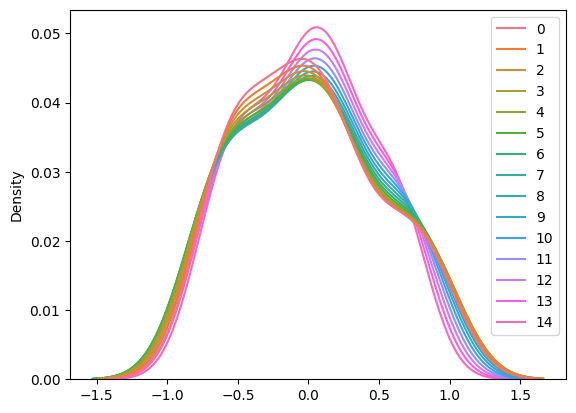

In [242]:
sns.kdeplot((theta[-50:-35:1,cluster_2].T-psi_c2[-50:-35:1]+np.pi)%(2*np.pi)-np.pi)

<AxesSubplot: ylabel='Density'>

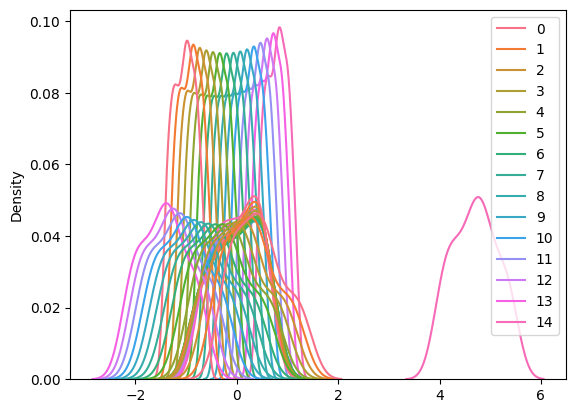

In [243]:
sns.kdeplot((theta[-50:-35:1,cluster_0].T-psi_c0[-50:-35:1]+np.pi)%(2*np.pi)-np.pi - psi_c1[-50:-35:1]+psi_c0[-50:-35:1])
sns.kdeplot((theta[-50:-35:1,cluster_1].T-psi_c1[-50:-35:1]+np.pi)%(2*np.pi)-np.pi)
sns.kdeplot((theta[-50:-35:1,cluster_2].T-psi_c2[-50:-35:1]+np.pi)%(2*np.pi)-np.pi - psi_c2[-50:-35:1]+psi_c0[-50:-35:1])


<AxesSubplot: ylabel='Density'>

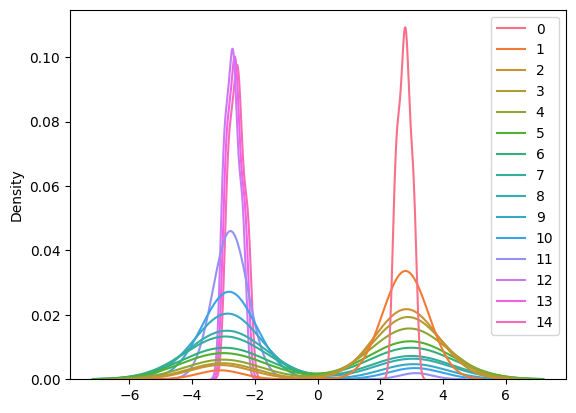

In [244]:
sns.kdeplot((theta[-15::1,cluster_2].T-psi[-15::1]+np.pi)%(2*np.pi)-np.pi)


<AxesSubplot: ylabel='Density'>

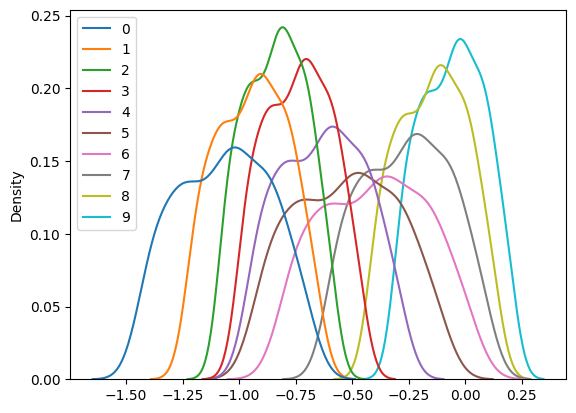

In [245]:
sns.kdeplot((theta[-100::10,cluster_0].T-psi[-10::1]+np.pi)%(2*np.pi)-np.pi)


<AxesSubplot: ylabel='Density'>

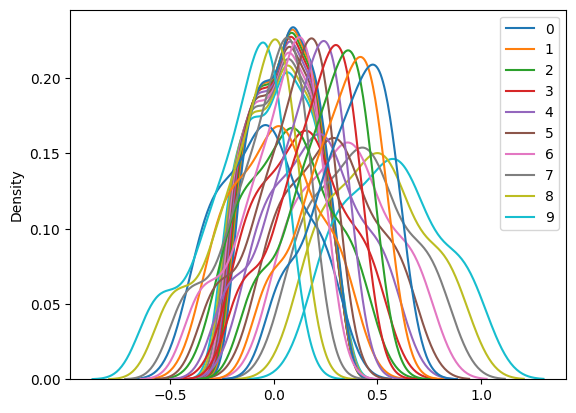

In [246]:

sns.kdeplot((theta[-10::1,cluster_0].T-psi[-10::1]+np.pi)%(2*np.pi)-np.pi)
sns.kdeplot((theta[-10::1,cluster_2].T-psi[-10::1])%(2*np.pi)-np.pi)
sns.kdeplot((theta[-10::1,cluster_1].T-psi[-10::1])%(2*np.pi)-np.pi)


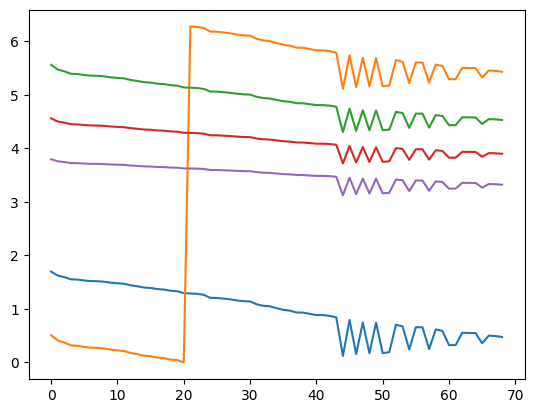

In [247]:
plt.plot((theta[-50::10,cluster_1].T-psi[-50::10])%(2*np.pi))

<AxesSubplot: ylabel='Density'>

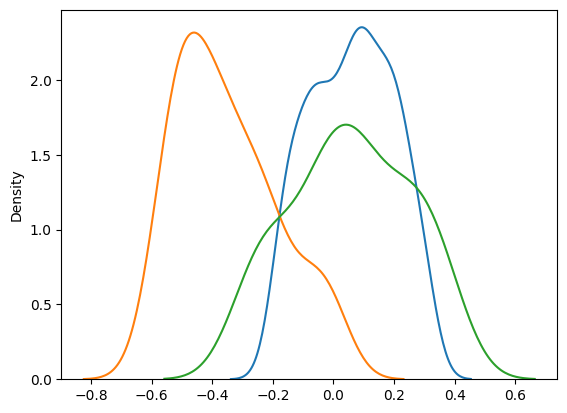

In [248]:
ind = 10
sns.kdeplot(np.sin(theta[-ind,cluster_0].T-psi[-ind]))
sns.kdeplot(np.sin(theta[-ind,cluster_1].T-psi[-ind]))
sns.kdeplot(np.sin(theta[-ind,cluster_2].T-psi[-ind]))


<AxesSubplot: ylabel='Density'>

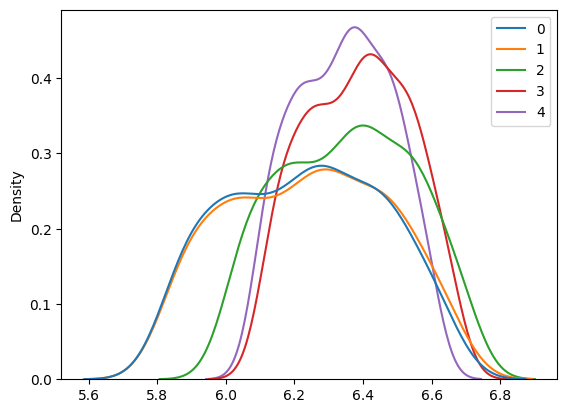

In [249]:
sns.kdeplot((theta[-50::10,cluster_0].T-psi[-50::10]-np.pi)%(2*np.pi)+np.pi)


In [250]:
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
p_arg = np.argwhere(HP>0.1).reshape(-1)
peaks = peaks[p_arg]

In [251]:
print(max_s)

[0.91197635 0.90857852]


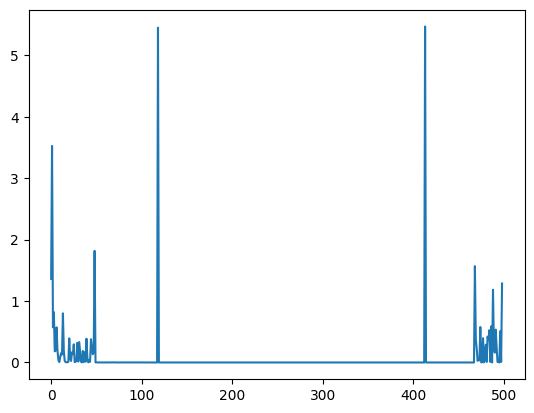

In [252]:
plt.plot(6*np.diff(avg_dtheta[-1,arg]))

In [253]:
peaks1, _ = find_peaks(diff1, height=0.005)
plt.plot(peaks1, diff1[peaks1], "X",label='peaks 1',markersize=6,color='tab:orange')

NameError: name 'diff1' is not defined

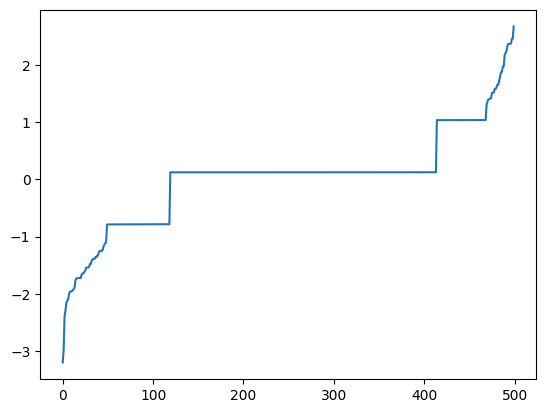

In [ ]:
plt.plot(avg_dtheta[-1,arg])

In [16]:
n = len(t)
k = np.arange(n)
Fs = 1/0.1; T = n/Fs
freq = k/T 

In [17]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.grid()
    
    plt.xlabel('Time [sec]'); plt.ylim([0, 0.5]); #plt.show()
    

In [18]:
from scipy import signal

def calc_stft(nperseg,r):
    f, t, Zxx = signal.stft(r, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

In [19]:
max_s/(2*np.pi)

array([0.15798837, 0.15767045])

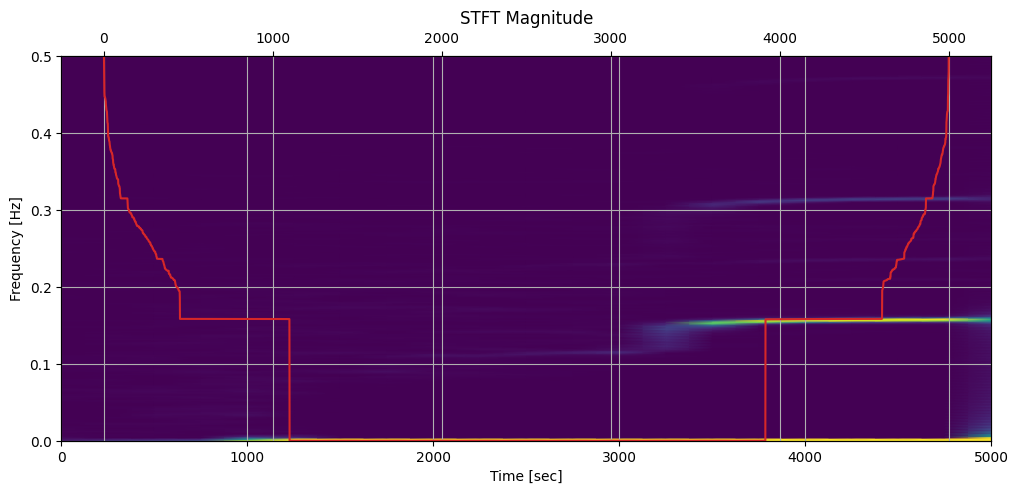

In [20]:
calc_stft(5000,rs)
ax =plt.gca()
ax.twiny()
plt.plot(abs(avg_dtheta[-1,arg]-avg_dtheta[-1][N//2])/(2*np.pi),color='tab:red')
plt.grid()

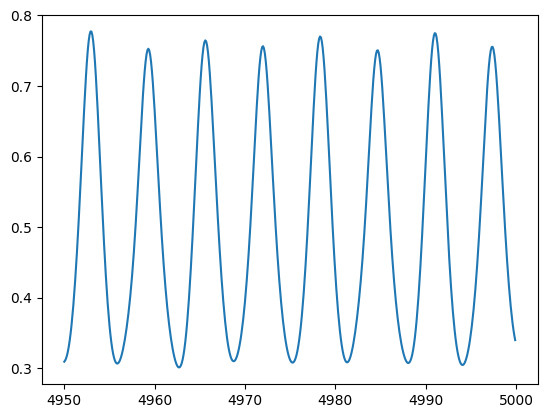

In [21]:
plt.plot(t[-500:],rs[-500:])

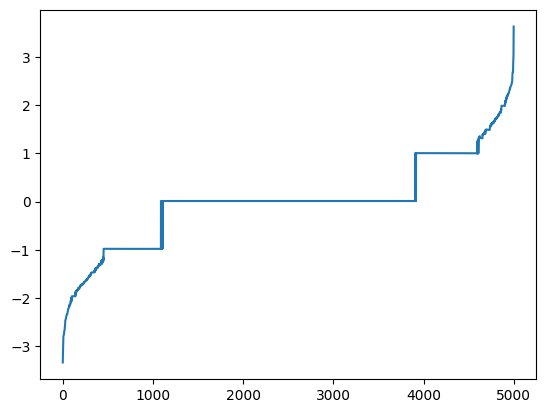

In [22]:
plt.plot(avg_dtheta[-1])

In [23]:
n_dtheta = dtheta / np.max(abs(dtheta))
def time_oscillator_dict(i):
    norm = n_dtheta[i]
    A = (1 - (norm)/2)
    theta_ = theta[i]
    sin,cos = A*np.sin(theta_), A*np.cos(theta_)
    
    return {'x':sin,'y':cos,'c':norm,'cmap':'bwr'}


def time_oscillator(i):
    norm = n_dtheta[i]
    A = (1 - (norm)/2)
    theta_ = theta[i]
    sin,cos = A*np.sin(theta_), A*np.cos(theta_)
    
    return sin,cos,norm,np.sin(theta_),np.cos(theta_)
# plt.plot(1+(n_dtheta));

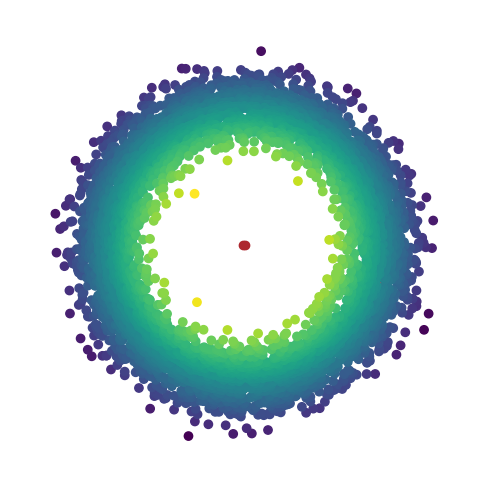

In [24]:
from itertools import combinations,permutations
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

i = 5200
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=100,facecolor=(1,1,1,0))


X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='#AD272E',lw=3,marker='o',zorder=3)
cmap = 'bwr'
s = 100
data = {
    'x': X,'y':Y,
    'c': omega,#'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax = ax.scatter(**data,zorder=1)



ax.plot(np.cos(c_),np.sin(c_),zorder=0,color='#D5464D',lw=6)
ax.set_xlim(-1.7,1.7)
ax.set_ylim(-1.7,1.7)
ax.axis('off')
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

In [25]:
fig.set_facecolor('white')
def ANI(i):
    ax.clear()
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='#AD272E',lw=3,marker='o',zorder=3)
    cmap = 'bwr'
    s = 100
    data = {
        'x': X,'y':Y,
        'c': C_,#'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax = ax.scatter(**data,zorder=1)



    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color='#D5464D',lw=6)
    ax.set_xlim(-1.7,1.7)
    ax.set_ylim(-1.7,1.7)
    ax.axis('off')
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    # ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

In [26]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
idxs = range(-500,-1,1)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
# ani.save('Groups oscillation m = 2, K = 2.3.mp4',dpi=400)
HTML(ani.to_html5_video())

In [28]:
multi_ =1.5

In [9]:
c_dtheta= np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (c_dtheta[sum_time:]-c_dtheta[:-sum_time])/sum_time
std_dtheta = [np.std(dtheta[i:sum_time+i],axis=0) for i in range(len(rs)-sum_time)]

c_rs= np.cumsum(rs,axis=0)
sum_time = 500
avg_rs = (c_rs[sum_time:]-c_rs[:-sum_time])/sum_time
std_rs = [np.std(rs[i:sum_time+i]) for i in range(len(rs)-sum_time)]


# data = np

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8),dpi=400, sharex=True)

plt.sca(ax1)
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
ln = plt.plot(t[sum_time:],avg_dtheta,alpha=0.2);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
# plt.vlines(t[sum_time+0],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
# plt.vlines(t[sum_time+1450],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
# plt.vlines(t[sum_time+5000],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
plt.ylim(-3.3,3.3)
ax1.set_ylabel(r'avg. angular vel.',fontsize=10*multi_)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.sca(ax2)
ax2.set_ylabel(r'$r$',fontsize=10*multi_)
plt.xlabel('time',fontsize=15)
plt.plot(t[sum_time:],avg_rs,lw=2);
# plt.errorbar(t[sum_time+0],avg_rs[0],std_rs[0],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
# plt.errorbar(t[sum_time+1450],avg_rs[1450],std_rs[1450],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
# plt.errorbar(t[sum_time+5000],avg_rs[5000],std_rs[5000],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
plt.fill_between(t[sum_time:],avg_rs-std_rs,avg_rs+std_rs,alpha=0.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.suptitle(r'$m=15$, $K=4.1$, $N=500$',fontsize=18)
plt.subplots_adjust(bottom=0.1, right=0.95, top=0.9)

cax = plt.axes([0.96, 0.1, 0.03, 0.8])
cbar = plt.colorbar(sca,cax=cax)
plt.sca(cax)
plt.yticks(fontsize=13)
cax.set_title(r'$\omega_i$',fontsize=10*multi_)
# plt.plot(std_rs)
# plt.tight_layout()

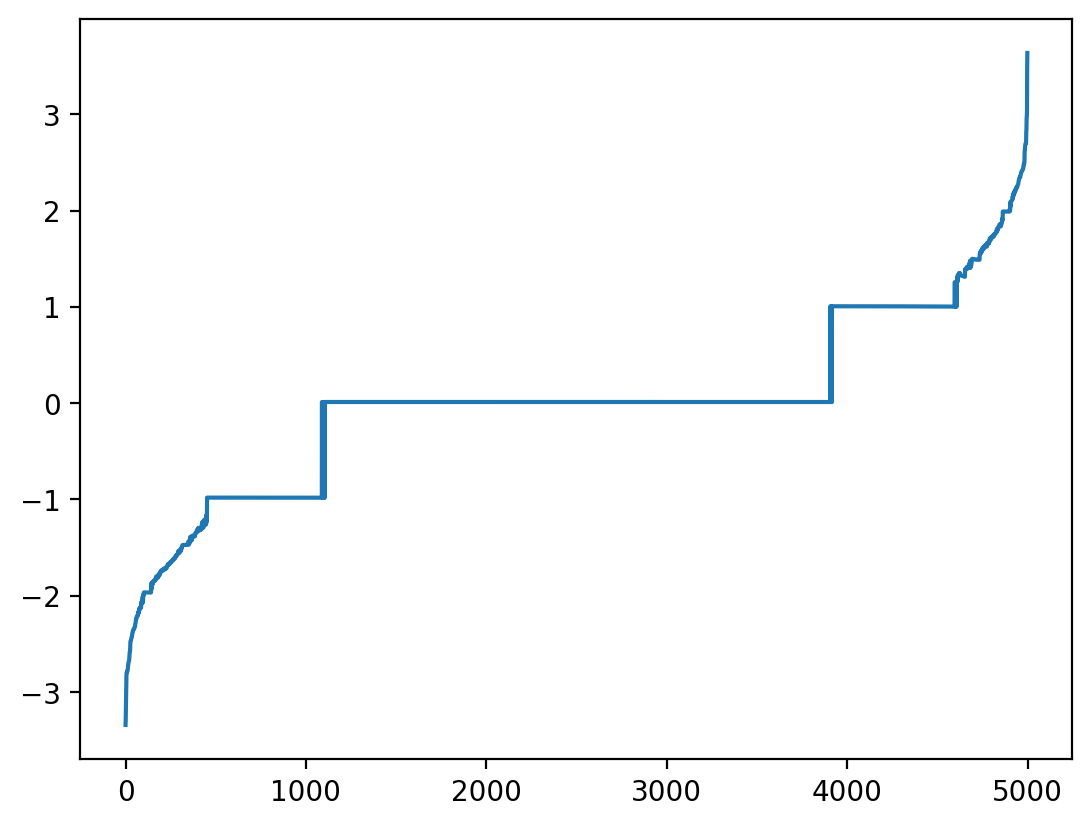

In [29]:
plt.plot(avg_dtheta[-1])

In [41]:
cluster_0 = arg[C_0[0]:C_0[1]]
cluster_1 = arg[C_1[0]:C_1[1]]
cluster_2 = arg[C_2[0]:C_2[1]]
cluster_l = arg[l_c[0]:l_c[1]]
cluster_r = arg[r_c[0]:r_c[1]]

In [87]:
c0_omega = np.mean(avg_dtheta[-1,cluster_0])
c1_omega = np.mean(avg_dtheta[-1,cluster_1])
c2_omega = np.mean(avg_dtheta[-1,cluster_2])
o_l = np.mean(avg_dtheta[-1,cluster_l]) - c0_omega
o_r = np.mean(avg_dtheta[-1,cluster_r]) - c0_omega

c0_nf = omega[cluster_0]
c1_nf = np.sort(omega[cluster_1])
c2_nf = np.sort(omega[cluster_2])

c0_avg_dtheta = avg_dtheta[-1,cluster_0]
c1_avg_dtheta = np.sort(avg_dtheta[-1,cluster_1])
c2_avg_dtheta = np.sort(avg_dtheta[-1,cluster_2])


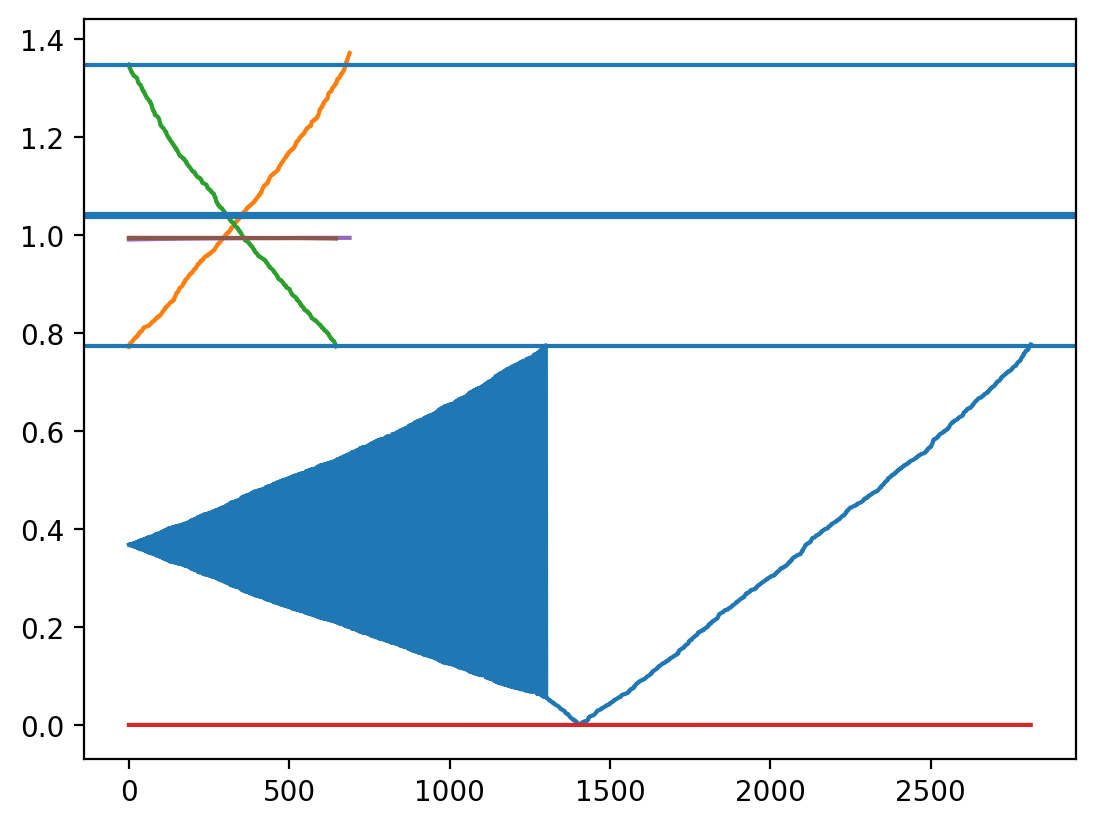

In [88]:
plt.plot(abs(c0_nf-np.mean(c0_nf)))
plt.plot(abs(c1_nf-np.mean(c0_nf)))
plt.plot(abs(c2_nf-np.mean(c0_nf)))
plt.axhline(abs(c2_nf-np.mean(c0_nf))[-1])
plt.axhline(abs(c2_nf-np.mean(c0_nf))[0])
plt.axhline(np.mean(abs(c2_nf-np.mean(c0_nf))))
plt.axhline(np.mean(abs(c1_nf-np.mean(c0_nf))))



plt.plot(abs(c0_avg_dtheta-np.mean(c0_avg_dtheta)))
plt.plot(abs(c1_avg_dtheta-np.mean(c0_avg_dtheta)))
plt.plot(abs(c2_avg_dtheta-np.mean(c0_avg_dtheta)))
# plt.axhline(abs(c2_avg_dtheta-np.mean(c0_avg_dtheta))[-1])
# plt.axhline(abs(c2_avg_dtheta-np.mean(c0_avg_dtheta))[0])
# plt.axhline(np.mean(abs(c2_avg_dtheta-np.mean(c0_avg_dtheta))))
# plt.axhline(np.mean(abs(c1_avg_dtheta-np.mean(c0_avg_dtheta))))

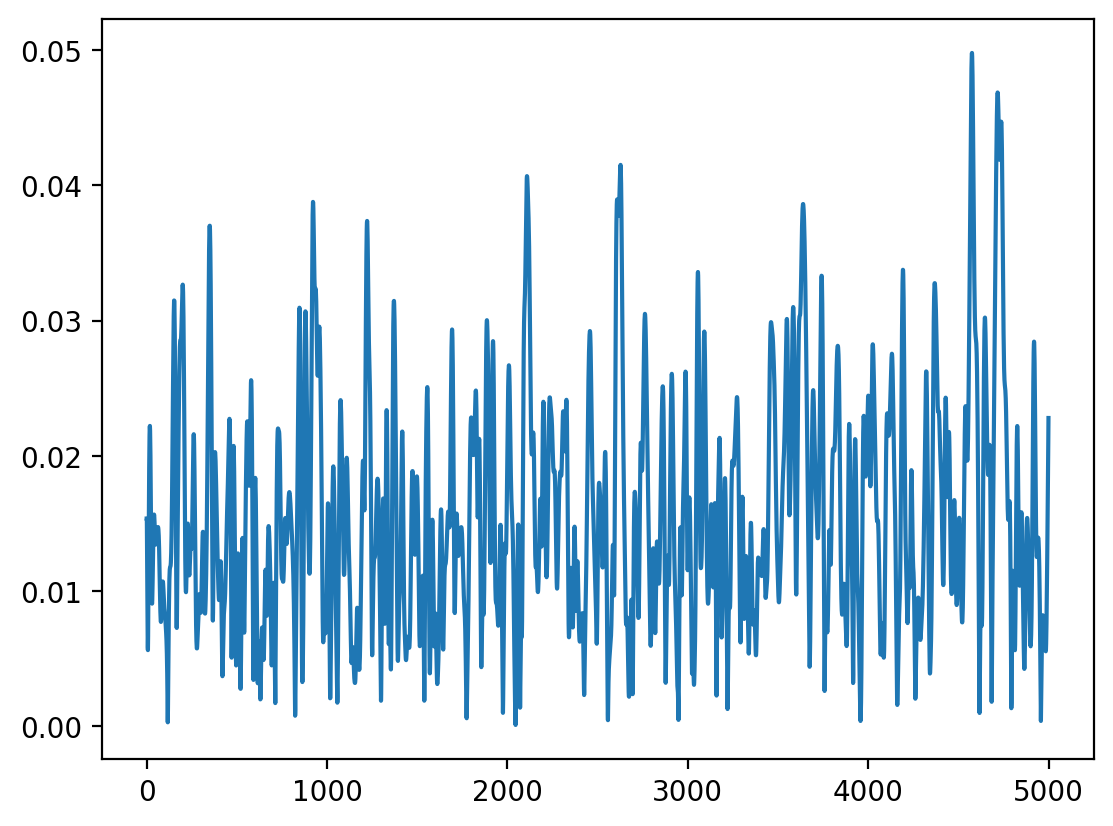

In [89]:
plt.plot(rs[:5000])

In [90]:
omega_p = lambda r,K,m : 4/np.pi*np.sqrt(K*r/m)

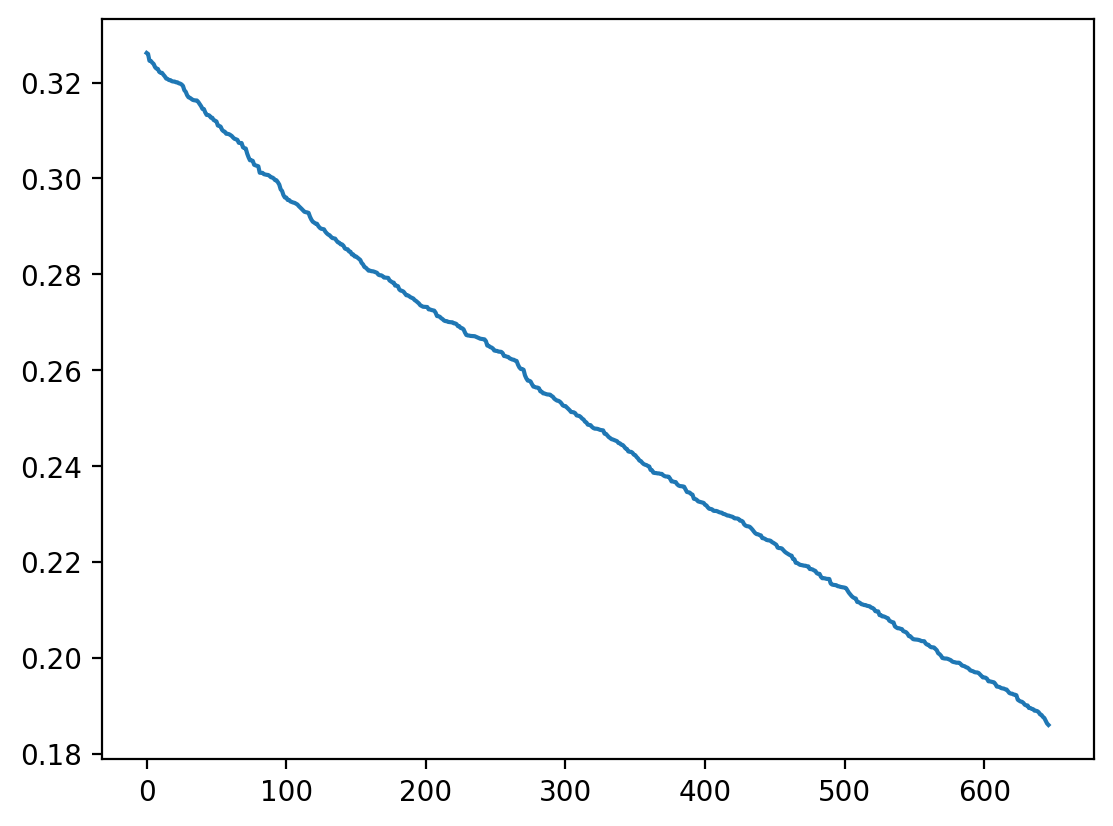

In [91]:
plt.plot(abs(c2_nf)/K)

In [94]:
rpsi_c0 = 1/N*np.sum(np.exp(1j*theta[:,cluster_0]),axis=1)
r_c0 = np.abs(rpsi_c0)
psi_c0 = np.angle(rpsi_c0)

rpsi_cl = 1/N*np.sum(np.exp(1j*theta[:,cluster_l]),axis=1)
r_cl = np.abs(rpsi_cl)
psi_cl = np.angle(rpsi_cl)

rpsi_cr = 1/N*np.sum(np.exp(1j*theta[:,cluster_r]),axis=1)
r_cr = np.abs(rpsi_cr)
psi_cr = np.angle(rpsi_cr)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

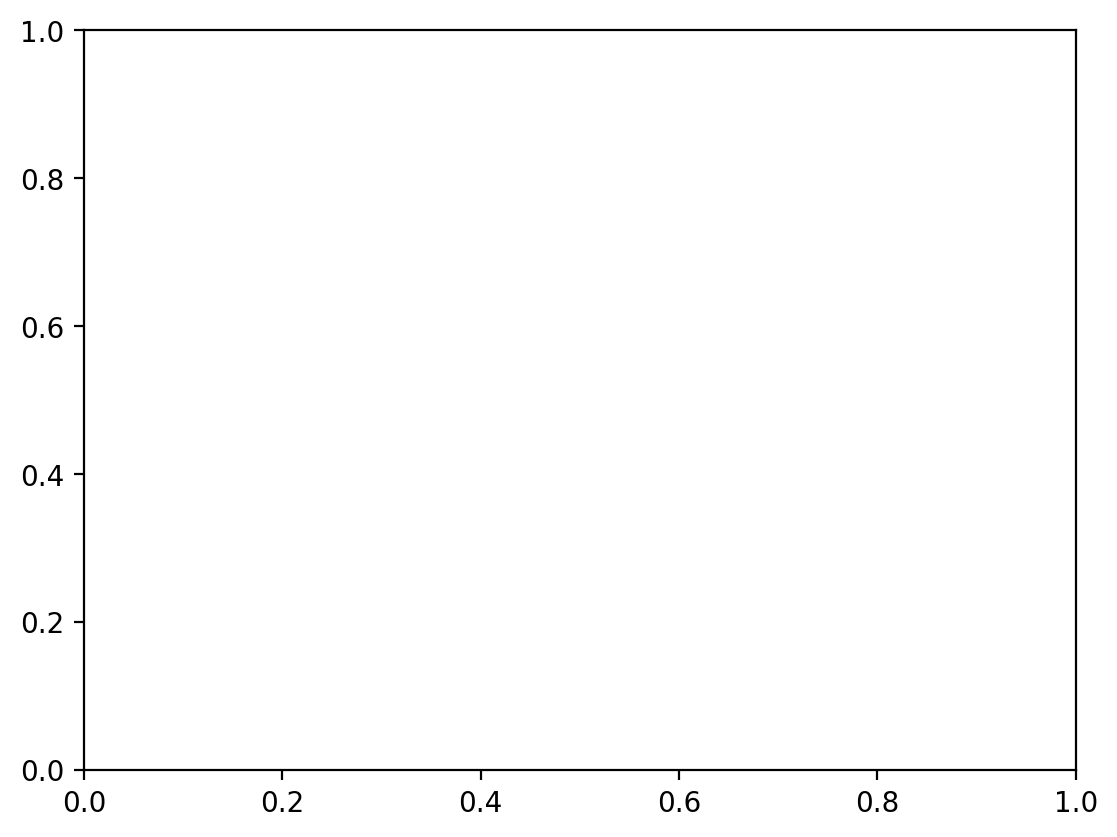

In [106]:
plt.axvline([1,2,3])

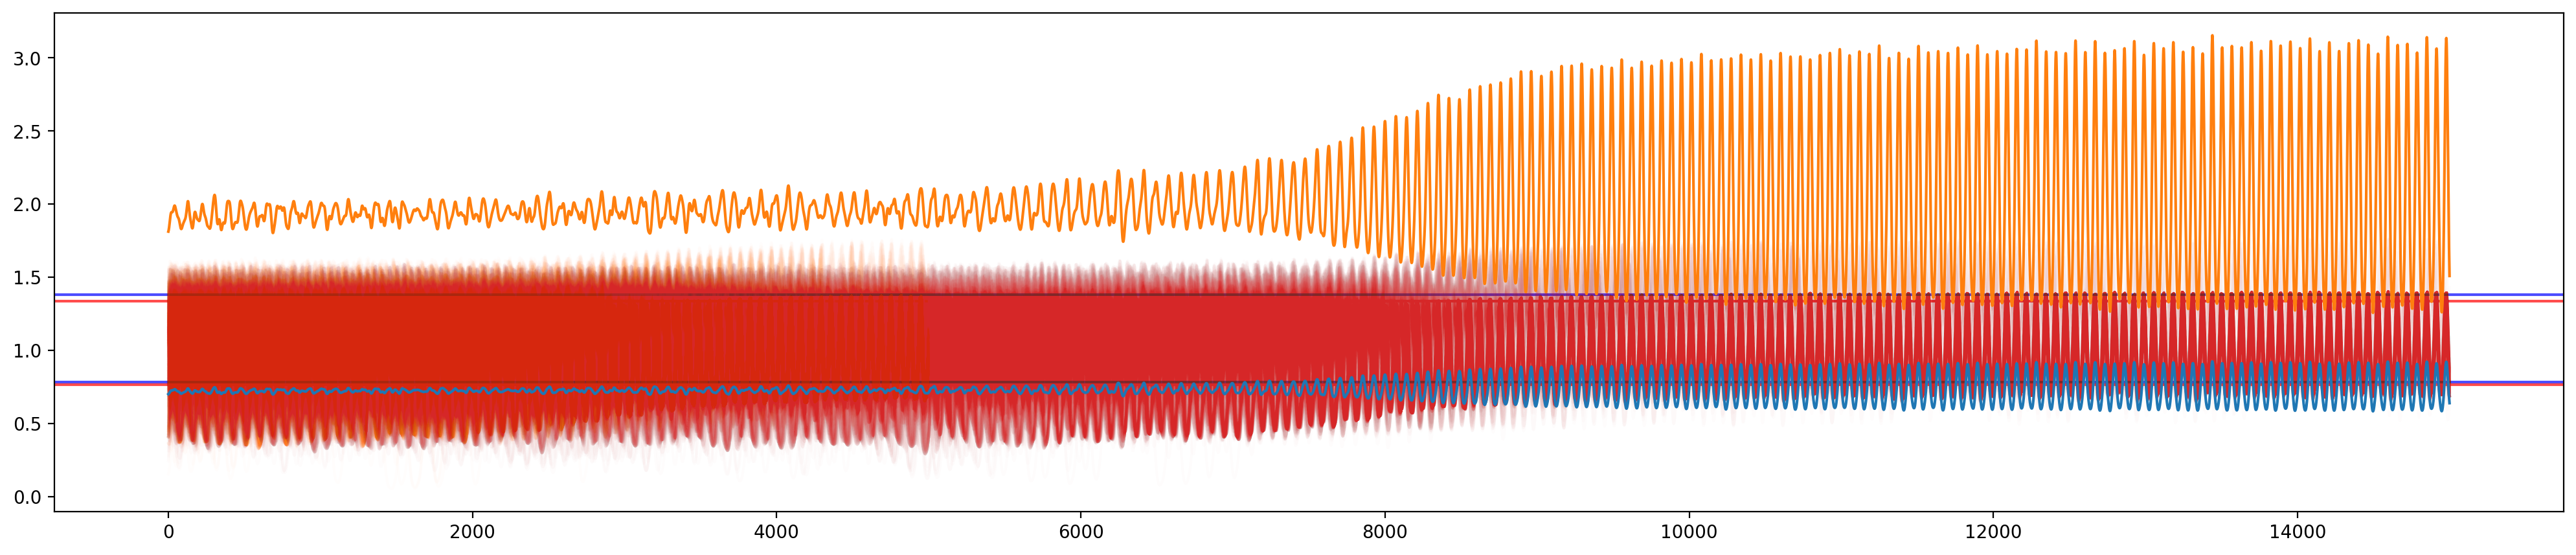

In [113]:
plt.figure(figsize=(25,5))

plt.axhline(np.sort(omega[cluster_r])[0] , color = 'blue',alpha=0.7);
plt.axhline(np.sort(omega[cluster_r])[-1] , color = 'blue',alpha=0.7);

plt.axhline(-np.sort(omega[cluster_l])[0] , color = 'red',alpha=0.7);
plt.axhline(-np.sort(omega[cluster_l])[-1] , color = 'red',alpha=0.7);
plt.plot(dtheta[30000:35000:1,cluster_r]-c0_omega,color = 'tab:orange',alpha=0.01);
plt.plot(abs(dtheta[25000:40000:1,cluster_l]-c0_omega),color = 'tab:red',alpha=0.01);
plt.plot(omega_p(rs[25000:40000:1],K,m));
plt.plot(K*rs[25000:40000:1]);

# plt.plot(omega_p(r_c0[1000:6000:10],K,m));
# plt.plot(K*r_c0[1000:6000:10]);

# plt.plot(np.sin(psi_c0-psi_c1)[-100:] - np.sin(psi_c0-psi_c2)[-100:])


In [38]:
np.mean(omega)

0.0

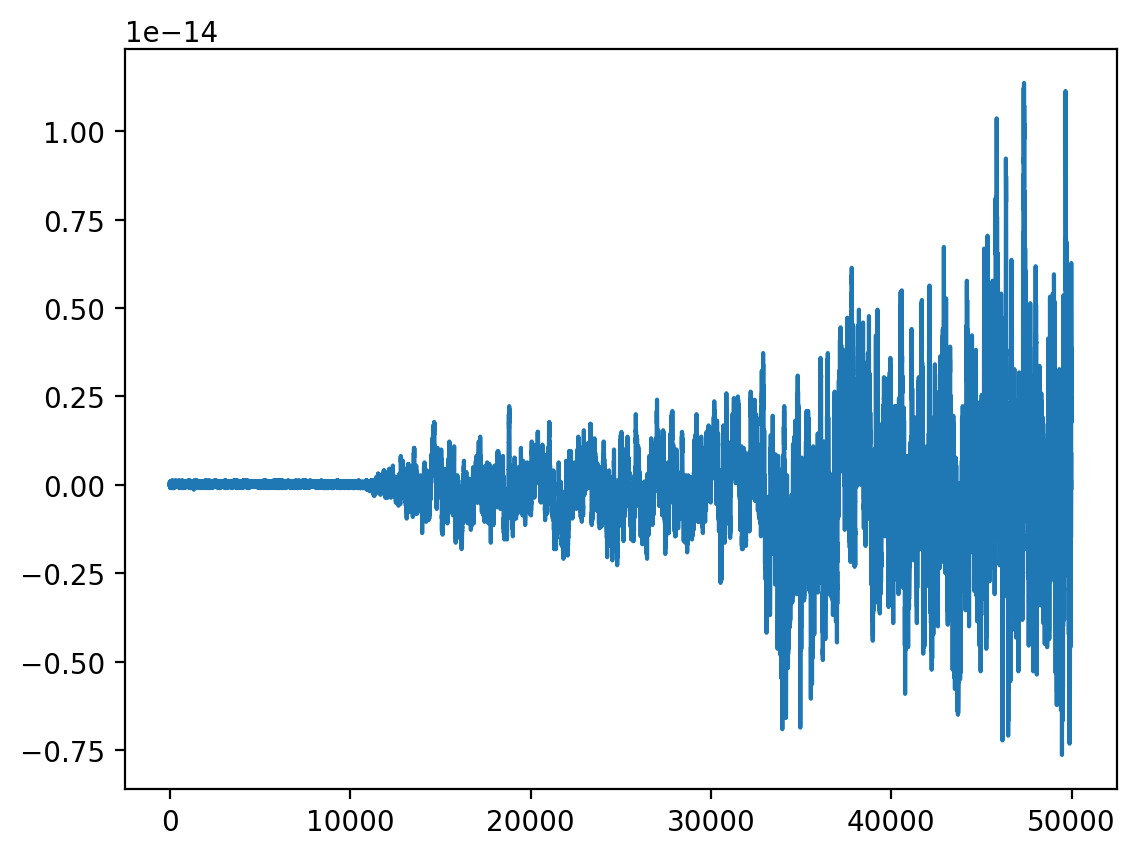

In [63]:
plt.plot(np.mean(dtheta[:,:],axis=1))

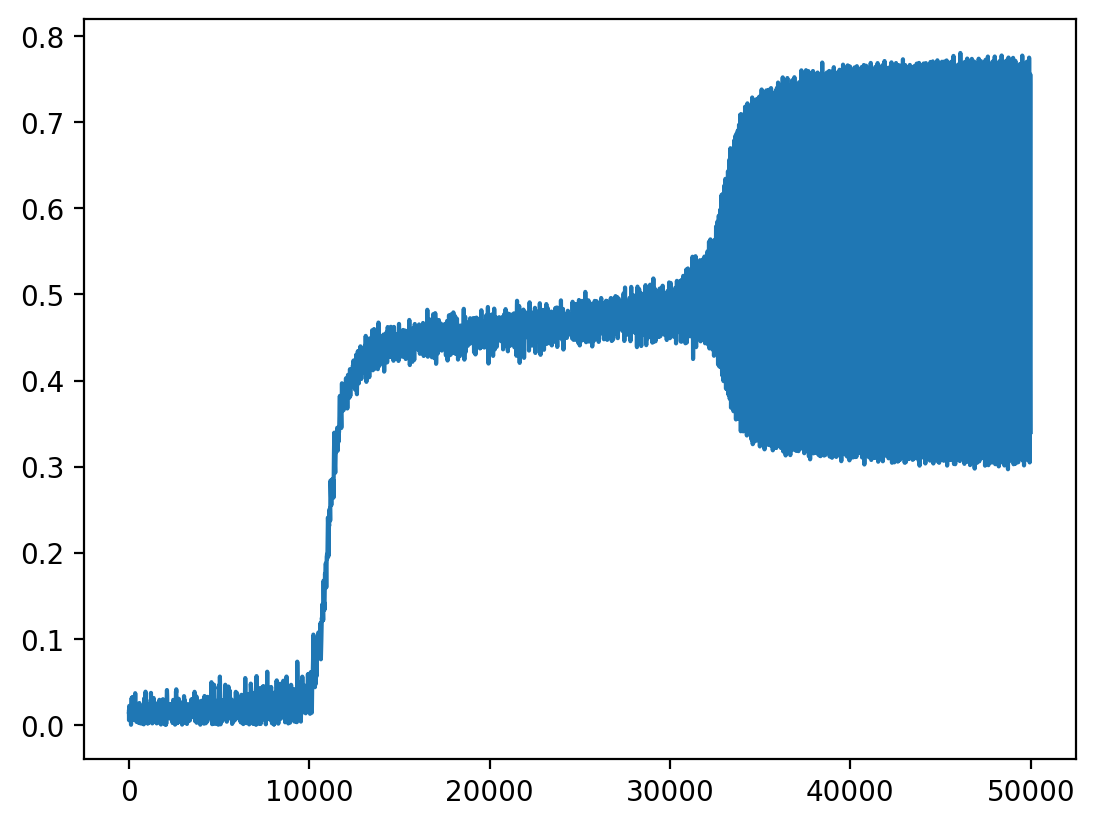

In [73]:
plt.plot(rs)

In [74]:
len(cluster_r)

689

In [119]:
cluster = []
for i in range(len(t)):
    cluster.append(len(np.where((K*rs[i]>dtheta[i,cluster_r]-np.mean(dtheta[-1,cluster_0]))& (dtheta[i,cluster_r]-np.mean(dtheta[-1,cluster_0]) >omega_p(rs[i],K,m)))[0]))

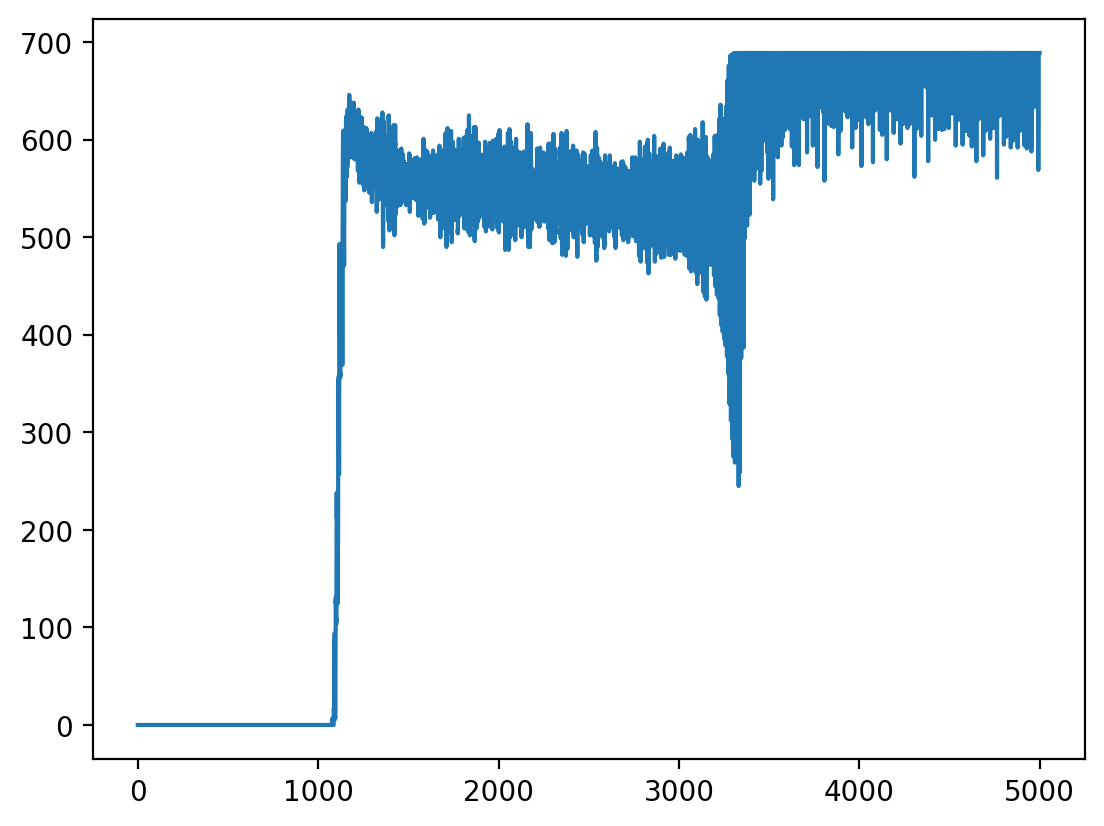

In [120]:
plt.plot(t,cluster)

In [83]:
for i in range(1,5000):
    i= -i
    print(len(np.where((K*rs[i]>dtheta[i,cluster_r])& (dtheta[i,cluster_r] >omega_p(rs[i],K,m)))[0]))

689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
640
608
594
588
581
577
578
587
592
596
608
621
635
656
675
687
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
687
685
687
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
686
681
678
678
681
685
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689
689


In [150]:
r_500 = rs[-500:]
min_r = np.min(r_500)
max_r = np.max(r_500)

In [163]:
np.mean(r_500)*K

2.0279255569288255

In [159]:
min_r,max_r

(0.2915443473390977, 0.7850937123275352)

In [127]:
print(c0_omega,c1_omega-c0_omega,c2_omega-c0_omega)

-0.01956732801050107 0.9946282983329529 -0.9948339099053207


In [169]:
np.mean(omega_p(r_500,K,m))

0.7300811221903818

In [135]:
r_c0[-1]*K

2.242002880647834

In [166]:
omega_p = lambda r,K,m : 4/np.pi*np.sqrt(K*r/m)

In [171]:
np.max(omega_p(r_500,K,m))

0.9325823062629913

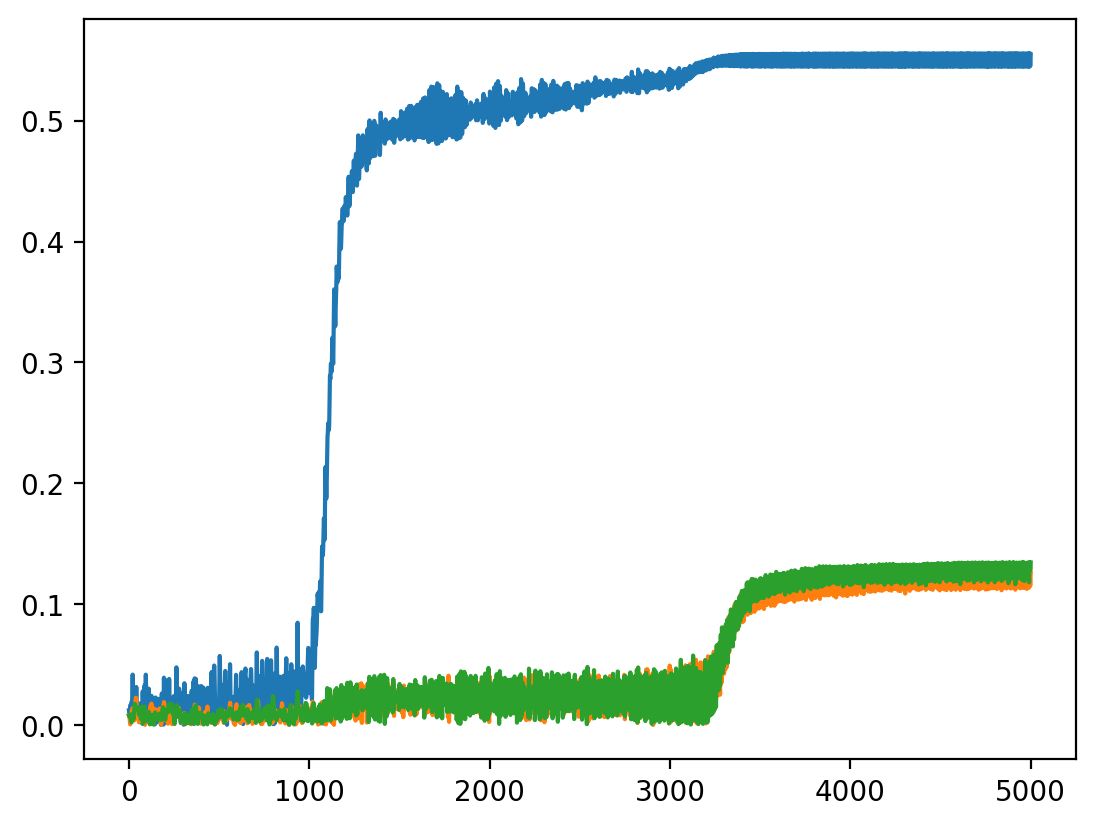

In [129]:
plt.plot(t,r_c0)
plt.plot(t,r_cl)
plt.plot(t,r_cr)


In [130]:
c0_omega

0.011534818910588393

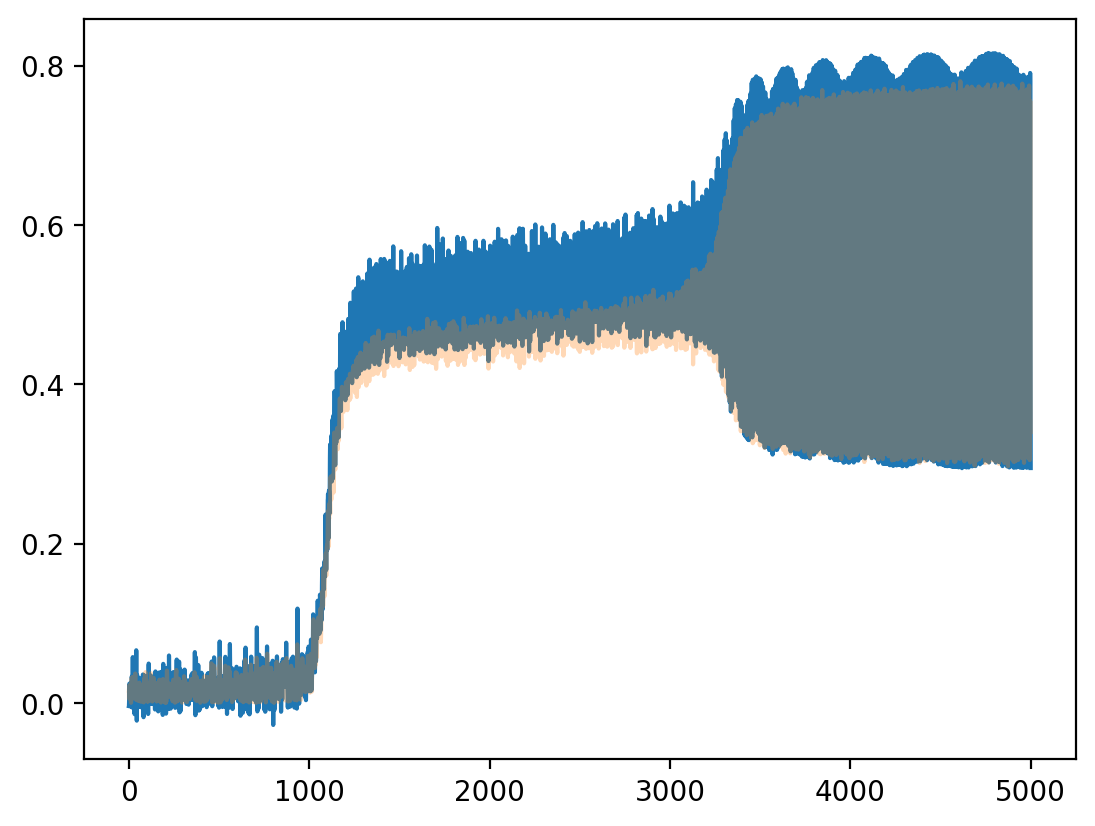

In [133]:
plt.plot(t,r_c0 - (r_cl+r_cr)*np.cos((o_l-c0_omega)*t) )
plt.plot(t,rs,alpha=0.3)